# Homework 2: Reuters News Dataset
**Reuters News Dataset includes news article which can be categorized into 46 subjects.**
- 로이터 뉴스 데이터셋은 뉴스 기사인 비정형 텍스트 데이터셋이다.
- 46개의 뉴스 카테고리로 레이블링된 데이터이기 때문에 지도학습이 가능하다.

### 1. Load the Dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 
from keras.datasets import reuters
from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=1000, test_split=0.2)
# train data 와 test data 의 비율을 8:2 로 나눈다.

In [3]:
print('number of train data : {}'.format(len(train_data)))
print('number of test data : {}'.format(len(test_data)))

# train data 와 test data 의 수를 각각 출력한다.

number of train data : 8982
number of test data : 2246


데이터셋이 어떻게 구성되어있는지 알기 위해 하나의 예시로 맨 첫번째 데이터를 출력해본다.

In [4]:
print(train_data[0]) # train data 의 맨 첫번째 데이터는 숫자로 이루어져있다. 이 숫자들이 의미하는 바는 단어의 인덱스이다.

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
print(train_labels[0])  # train data 의 맨 첫번째 데이터는 카테고리 번호 3번으로 레이블링 되어있다.

3


### 2. EDA (Exploratory Data Analysis)¶

In [6]:
len_result = [len(_) for _ in train_data]

print('Max length of the news article : {}'.format(np.max(len_result)))
print('Average length of the news article : {}'.format(np.mean(len_result)))

# 뉴스 기사별로 길이가 모두 다름을 알 수 있다. 평균 길이는 145자이지만 가장 긴 길이는 2376자이다.

Max length of the news article : 2376
Average length of the news article : 145.5398574927633


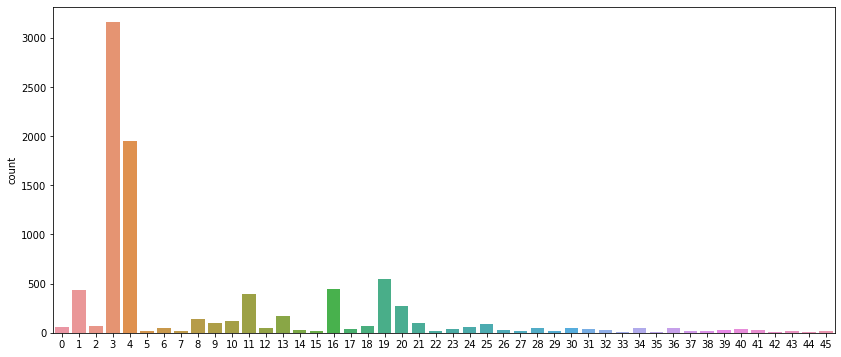

In [7]:
fig, _ = plt.subplots(ncols=1)
fig.set_size_inches(14,6)
sns.countplot(train_labels)

# 전체 뉴스 기사 중에서 총 46개의 뉴스 카테고리 중 3번과 4번이 가장 많은 비중을 차지하고 있다.
# 따라서 카테고리별로 데이터가 불균형하다.

### 3. Pre-processing

#### One-hot Encoding

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_val = vectorize_sequences(test_data)

In [9]:
# 레이블링된 카테고리를 원 핫 인코딩을 통해 벡터의 차원으로 표현한다.
y_train = to_categorical(train_labels)
y_val = to_categorical(test_labels)

## Experiments

In [10]:
from keras import models
from keras import layers

### (1) Basic Neural Network Model
- activation function: relu, sigmoid
- optimizer: Adam
- loss function: mean_squared_error
- batch size: 64
- epoch: 20

In [11]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))

In [12]:
model.compile(optimizer='adam',
             loss='mean_squared_error',
             metrics=['accuracy'])

In [13]:
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_data=(x_val, y_val))

Epoch 1/20
71/71 [==============================] - 1s 14ms/step - loss: 0.1502 - accuracy: 0.1487 - val_loss: 0.0168 - val_accuracy: 0.4684
Epoch 2/20
71/71 [==============================] - 0s 6ms/step - loss: 0.0154 - accuracy: 0.5129 - val_loss: 0.0126 - val_accuracy: 0.5365
Epoch 3/20
71/71 [==============================] - 0s 5ms/step - loss: 0.0120 - accuracy: 0.5430 - val_loss: 0.0115 - val_accuracy: 0.5427
Epoch 4/20
71/71 [==============================] - 0s 4ms/step - loss: 0.0113 - accuracy: 0.5368 - val_loss: 0.0112 - val_accuracy: 0.5427
Epoch 5/20
71/71 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.5440 - val_loss: 0.0111 - val_accuracy: 0.5445
Epoch 6/20
71/71 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 0.5609 - val_loss: 0.0111 - val_accuracy: 0.5610
Epoch 7/20
71/71 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 0.5791 - val_loss: 0.0106 - val_accuracy: 0.5908
Epoch 8/20
71/71 [=

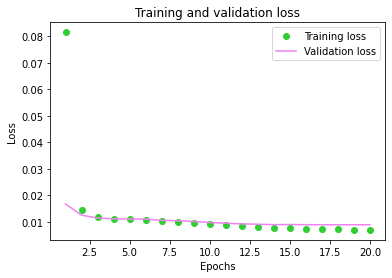

In [14]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### (2) Basic model + loss function = categorical_crossentropy
다중분류에 사용되는 손실함수인 categorial_crossentropy 를 사용해 모델을 변경했다. categorical_crossentropy 함수는 one-hot encoding 으로 클래스가 나눠진 경우에 사용할 수 있다.
- activation function: relu, sigmoid
- optimizer: Adam
- **loss function: categorical_crossentropy**
- batch size: 64
- epoch: 20

In [15]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))

In [16]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 128,
                    validation_data=(x_val, y_val))

Epoch 1/20
71/71 [==============================] - 1s 7ms/step - loss: 2.9068 - accuracy: 0.4513 - val_loss: 1.4698 - val_accuracy: 0.6679
Epoch 2/20
71/71 [==============================] - 0s 4ms/step - loss: 1.2790 - accuracy: 0.7131 - val_loss: 1.1764 - val_accuracy: 0.7284
Epoch 3/20
71/71 [==============================] - 0s 4ms/step - loss: 1.0241 - accuracy: 0.7771 - val_loss: 1.0440 - val_accuracy: 0.7569
Epoch 4/20
71/71 [==============================] - 0s 4ms/step - loss: 0.7657 - accuracy: 0.8223 - val_loss: 0.9750 - val_accuracy: 0.7729
Epoch 5/20
71/71 [==============================] - 0s 4ms/step - loss: 0.6555 - accuracy: 0.8470 - val_loss: 0.9492 - val_accuracy: 0.7747
Epoch 6/20
71/71 [==============================] - 0s 4ms/step - loss: 0.5491 - accuracy: 0.8771 - val_loss: 0.9159 - val_accuracy: 0.7934
Epoch 7/20
71/71 [==============================] - 0s 4ms/step - loss: 0.4798 - accuracy: 0.8898 - val_loss: 0.9261 - val_accuracy: 0.7898
Epoch 8/20
71/71 [==

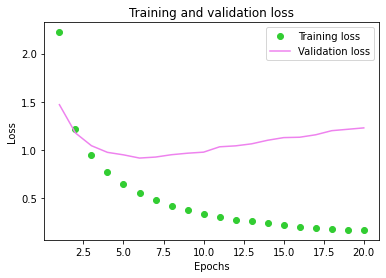

In [18]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**결과: 손실함수를 categorical_crossentropy 로 바꾸자 정확도는 76% 로 증가했다. training loss 는 epoch 가 늘어날수록 줄어드나 validation loss 는 증가해 학습이 안정적으로 이루어지지 않았다.**

### (3) Basic model + loss function = categorical_crossentropy + activation = softmax
softmax 함수는 다중분류에 많이 사용되는 활성화 함수이다. 로이터 뉴스 기사 데이터는 카테고리가 46개이므로 softmax 함수를 사용해본다.
- **activation function: relu, softmax**
- optimizer: Adam
- loss function: categorical_crossentropy
- batch size: 64
- epoch: 20

In [19]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [20]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 64,
                    validation_data=(x_val, y_val))

Epoch 1/20
141/141 [==============================] - 1s 4ms/step - loss: 2.5209 - accuracy: 0.5040 - val_loss: 1.2896 - val_accuracy: 0.7004
Epoch 2/20
141/141 [==============================] - 0s 3ms/step - loss: 1.1033 - accuracy: 0.7498 - val_loss: 1.0599 - val_accuracy: 0.7596
Epoch 3/20
141/141 [==============================] - 0s 3ms/step - loss: 0.8310 - accuracy: 0.8128 - val_loss: 0.9853 - val_accuracy: 0.7654
Epoch 4/20
141/141 [==============================] - 0s 3ms/step - loss: 0.6528 - accuracy: 0.8446 - val_loss: 0.9401 - val_accuracy: 0.7752
Epoch 5/20
141/141 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.8720 - val_loss: 0.9304 - val_accuracy: 0.7801
Epoch 6/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.8936 - val_loss: 0.9329 - val_accuracy: 0.7809
Epoch 7/20
141/141 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.9173 - val_loss: 0.9664 - val_accuracy: 0.7778
Epoch 

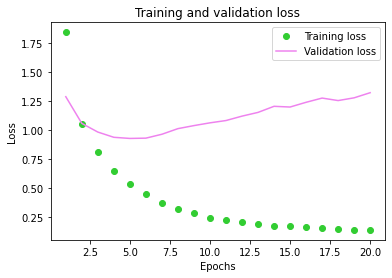

In [22]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**결과: softmax 함수를 사용해도 오버피팅이 해결되지 않았다.**

### (4) Basic model + loss function = categorical_crossentropy + activation = relu, softmax + Adding more layers
바로 앞선 실험의 모델에서 신경망 층을 더 추가해보았다.
- activation function: relu, softmax
- optimizer: Adam
- loss function: categorical_crossentropy
- batch size: 64
- epoch: 20

In [23]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [24]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 64,
                    validation_data=(x_val, y_val))

Epoch 1/20
141/141 [==============================] - 1s 4ms/step - loss: 2.5542 - accuracy: 0.4135 - val_loss: 1.4573 - val_accuracy: 0.6625
Epoch 2/20
141/141 [==============================] - 1s 4ms/step - loss: 1.2435 - accuracy: 0.7096 - val_loss: 1.2043 - val_accuracy: 0.7142
Epoch 3/20
141/141 [==============================] - 0s 3ms/step - loss: 0.9659 - accuracy: 0.7629 - val_loss: 1.1155 - val_accuracy: 0.7391
Epoch 4/20
141/141 [==============================] - 0s 3ms/step - loss: 0.7289 - accuracy: 0.8245 - val_loss: 1.0973 - val_accuracy: 0.7418
Epoch 5/20
141/141 [==============================] - 0s 3ms/step - loss: 0.5988 - accuracy: 0.8475 - val_loss: 1.1206 - val_accuracy: 0.7498
Epoch 6/20
141/141 [==============================] - 0s 3ms/step - loss: 0.5074 - accuracy: 0.8594 - val_loss: 1.1845 - val_accuracy: 0.7427
Epoch 7/20
141/141 [==============================] - 1s 4ms/step - loss: 0.4417 - accuracy: 0.8827 - val_loss: 1.2267 - val_accuracy: 0.7520
Epoch 

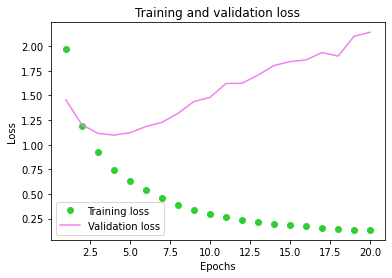

In [26]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**결과: 신경망 레이어를 추가해도 오버피팅 문제를 해결할 수 없었다.**

### (5) Basic model + loss function = categorical_hinge + activation = relu, softmax
손실함수를 분류기에 많이 사용되는 categorical_crossentropy 에서 categorical_hinge 로 변경해보았다. 
- activation function: relu, softmax
- optimizer: Adam
- loss function: categorical_crossentropy
- batch size: 64
- epoch: 20

In [27]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [28]:
model.compile(optimizer='adam',
             loss='categorical_hinge',
             metrics=['accuracy'])

In [29]:
history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 64,
                    validation_data=(x_val, y_val))

Epoch 1/20
141/141 [==============================] - 1s 4ms/step - loss: 0.8961 - accuracy: 0.4558 - val_loss: 0.5408 - val_accuracy: 0.6073
Epoch 2/20
141/141 [==============================] - 0s 3ms/step - loss: 0.5247 - accuracy: 0.6534 - val_loss: 0.5222 - val_accuracy: 0.6745
Epoch 3/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.7038 - val_loss: 0.5026 - val_accuracy: 0.6861
Epoch 4/20
141/141 [==============================] - 0s 3ms/step - loss: 0.4501 - accuracy: 0.7126 - val_loss: 0.4468 - val_accuracy: 0.7061
Epoch 5/20
141/141 [==============================] - 0s 3ms/step - loss: 0.3885 - accuracy: 0.7483 - val_loss: 0.4383 - val_accuracy: 0.7133
Epoch 6/20
141/141 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.7630 - val_loss: 0.4311 - val_accuracy: 0.7195
Epoch 7/20
141/141 [==============================] - 0s 3ms/step - loss: 0.3399 - accuracy: 0.7832 - val_loss: 0.4292 - val_accuracy: 0.7289
Epoch 

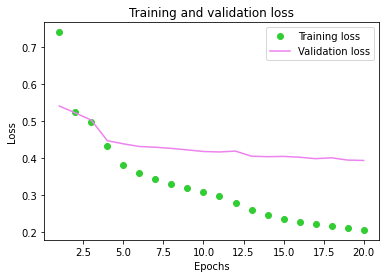

In [30]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**결과: 이 경우 예측 정확도는 77%가 나왔다. 학습 수가 늘어날수록 validation loss 가 줄어드는 추세이나 급격히 줄어들지는 않았다.**

### (6) Basic model + loss function = categorical_hinge + activation = relu, softmax + batch_size = 256
안정적인 학습을 위해 batch size 를 64에서 256으로 키워보았다. 
- activation function: relu, softmax
- optimizer: Adam
- loss function: categorical_hinge
- **batch size: 256**
- epoch: 20

In [31]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [32]:
model.compile(optimizer='adam',
             loss='categorical_hinge',
             metrics=['accuracy'])

In [33]:
history = model.fit(x_train,
                    y_train,
                    epochs = 50,
                    batch_size = 256,
                    validation_data=(x_val, y_val))

Epoch 1/50
36/36 [==============================] - 1s 24ms/step - loss: 0.9930 - accuracy: 0.4125 - val_loss: 0.7738 - val_accuracy: 0.5628
Epoch 2/50
36/36 [==============================] - 0s 9ms/step - loss: 0.6567 - accuracy: 0.6030 - val_loss: 0.5470 - val_accuracy: 0.6598
Epoch 3/50
36/36 [==============================] - 0s 9ms/step - loss: 0.5265 - accuracy: 0.6825 - val_loss: 0.5277 - val_accuracy: 0.6728
Epoch 4/50
36/36 [==============================] - 0s 9ms/step - loss: 0.5037 - accuracy: 0.7007 - val_loss: 0.5033 - val_accuracy: 0.6857
Epoch 5/50
36/36 [==============================] - 0s 9ms/step - loss: 0.4704 - accuracy: 0.7090 - val_loss: 0.4764 - val_accuracy: 0.7017
Epoch 6/50
36/36 [==============================] - 0s 9ms/step - loss: 0.4271 - accuracy: 0.7375 - val_loss: 0.4629 - val_accuracy: 0.7093
Epoch 7/50
36/36 [==============================] - 0s 9ms/step - loss: 0.4056 - accuracy: 0.7491 - val_loss: 0.4491 - val_accuracy: 0.7320
Epoch 8/50
36/36 [=

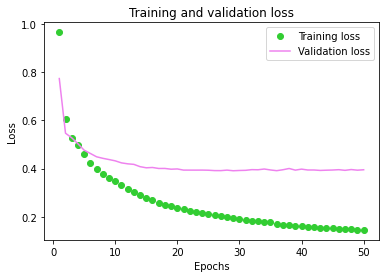

In [34]:
# loss 의 변화 시각화

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss', color='limegreen')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'violet')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**결과: 배치 사이즈를 늘린 결과, 바로 전 경우보다 예측 정확도가 조금 오른, 78%가 나왔다. 그러나 validation loss 는 급격히 줄어들다 아주 서서히 줄어드는 모양세를 보였다.**

## Results

**실험 중 가장 높은 정확도: 78%**
- activation function: relu, softmax
- optimizer: Adam
- loss function: categorical_hinge
- batch size: 256
- epoch: 20

## Insights

로이터 뉴스 기사 데이터는 분류할 카테고리가 46개로 아주 많은 편에 속했다. 이러한 다중 분류의 경우에는 **softmax 활성화 함수**를 사용해야 한다. 또한, 원 핫 인코딩을 통해 인코딩을 했기 때문에 loss 함수를 **categorical_crossentropy 또는 cross_hinge 함수**를 사용해 분류해야한다.